In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jaysu\anaconda3\lib\site-packages (0.0)


In [4]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("../data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()


# Feature Selection
### We will use all the features except for the 'NA' columns

In [11]:
# Set features using the cleaned dataframe. This will also be used as your x values.
selected_features = df.drop(labels='koi_disposition', axis=1)
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
# pull out the output labels column or y values
labels = df['koi_disposition']

In [13]:
# Split the data in training and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.8, random_state=3 )

In [14]:
# inspect the new dataframe to see it's shape
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2471,0,0,0,0,24.674582,8.150000e-05,-8.150000e-05,146.772610,0.002510,-0.002510,...,-164,4.562,0.045,-0.135,0.812,0.175,-0.075,292.16278,41.023239,14.769
1965,0,0,0,0,6.002548,9.700000e-06,-9.700000e-06,171.714190,0.001280,-0.001280,...,-136,4.269,0.084,-0.116,1.360,0.228,-0.166,290.49512,38.795479,12.730
6013,1,0,0,0,451.865790,2.203000e-02,-2.203000e-02,254.806100,0.032500,-0.032500,...,-398,4.154,0.119,-0.119,2.005,0.930,-0.425,297.67926,41.613731,11.020
9,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,-0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563
2665,0,0,0,0,5.690592,1.100000e-05,-1.100000e-05,174.048850,0.001430,-0.001430,...,-105,4.538,0.045,-0.055,0.810,0.060,-0.044,296.65475,46.835270,13.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,1,0,0,0,572.376632,6.215000e-03,-6.215000e-03,306.510060,0.004250,-0.004250,...,-124,4.264,0.115,-0.115,1.299,0.231,-0.173,297.04541,46.328701,13.955
1667,0,0,0,0,16.057329,1.074000e-04,-1.074000e-04,132.390540,0.005920,-0.005920,...,-152,4.575,0.036,-0.144,0.806,0.182,-0.061,296.75339,49.378109,15.869
3321,0,0,0,0,0.428046,1.090000e-06,-1.090000e-06,131.836820,0.002060,-0.002060,...,-143,4.566,0.049,-0.091,0.775,0.121,-0.069,286.14777,38.241798,15.247
1688,0,0,0,0,2.607545,6.590000e-06,-6.590000e-06,131.834530,0.002080,-0.002080,...,-236,4.435,0.052,-0.208,1.096,0.333,-0.119,287.79385,45.980240,15.618


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.27968093e-02 5.19636549e-04 9.99480363e-01 3.33830069e-02
 5.32201341e-03 9.94677987e-01 8.15401812e-03 1.22370937e-03
 9.90475388e-01 2.22488208e-02 4.09900990e-03 9.95900990e-01
 6.97760840e-04 5.16519311e-04 9.99483481e-01 1.09310969e-05
 2.31053604e-05 9.99997150e-01 3.10120069e-02 1.88991979e-06
 3.79858898e-06 9.99998998e-01 3.53319807e-03 1.66666667e-01
 2.11182471e-01 2.42603550e-01 9.05366417e-01 8.62299465e-01
 3.05706522e-02 8.65938431e-01 3.86888053e-03 6.74217907e-03
 9.99277631e-01 5.62857540e-01 2.82122131e-01 6.44929333e-01]


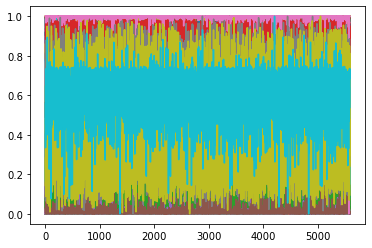

In [15]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

# Train the Model



In [8]:
# Random Forest Classifier model for training
# Hypertuning results: {'bootstrap': True, 'max_depth': 40, 'min_samples_split': 8, 'n_estimators': 200}
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=10, bootstrap= True, max_depth= 10, min_samples_split= 8)
# clf = clf.fit(X_train_scaled, y_train)

# print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

In [9]:
# need to pick the setting anad rsearch

k: 1, Train/Test Score: 0.999/0.818
k: 3, Train/Test Score: 0.914/0.857
k: 5, Train/Test Score: 0.897/0.874
k: 7, Train/Test Score: 0.895/0.871
k: 9, Train/Test Score: 0.891/0.876
k: 11, Train/Test Score: 0.891/0.874
k: 13, Train/Test Score: 0.887/0.874
k: 15, Train/Test Score: 0.888/0.875
k: 17, Train/Test Score: 0.888/0.877
k: 19, Train/Test Score: 0.888/0.876


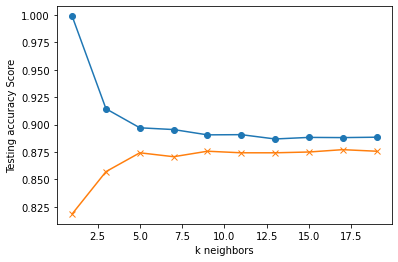

In [10]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.874


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [14]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid={'leaf_size': [20, 30, 40], 'n_neighbors' : [3, 5, 7, 9],
'p' : [1, 2]}
grid = GridSearchCV(knn, param_grid, verbose=3)

# To get list of parameters you can tune
knn.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [18]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

0, n_neighbors=3, p=2, score=0.865, total=   0.1s
[CV] leaf_size=40, n_neighbors=3, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=3, score=0.853, total=   0.3s
[CV] leaf_size=40, n_neighbors=3, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=3, score=0.857, total=   0.3s
[CV] leaf_size=40, n_neighbors=3, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=3, score=0.870, total=   0.3s
[CV] leaf_size=40, n_neighbors=3, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=3, score=0.843, total=   0.4s
[CV] leaf_size=40, n_neighbors=3, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=3, score=0.867, total=   0.3s
[CV] leaf_size=40, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=40, n_neighbors=3, p=4, score=0.853, total=   0.3s
[CV] leaf_size=40, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=40, n_n

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'p': [1, 2, 3, 4, 5]},
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 10, 'n_neighbors': 11, 'p': 5}
0.8776853215159843


# Save the Model

In [20]:
import joblib
filename = 'model_2_randomforest_extratreeclassifer.h5'
joblib.dump(clf, filename)

['model_2_randomforest_extratreeclassifer.h5']